In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
data=pd.read_csv(r"C:\Users\hp\Downloads\delivery_time.csv")
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

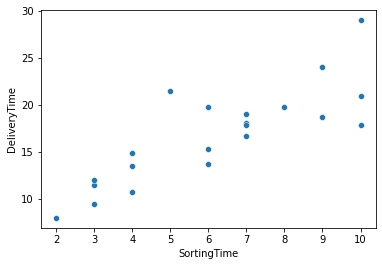

In [31]:
sns.scatterplot(x=data['SortingTime'],y=data['DeliveryTime'])

In [32]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


# Training the model

In [33]:
import statsmodels.formula.api as smf

In [34]:
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

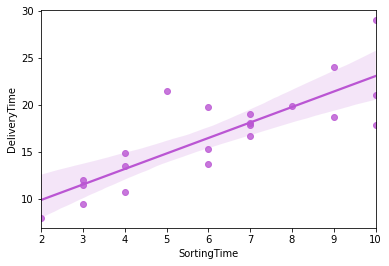

In [35]:
sns.regplot(x="SortingTime",y="DeliveryTime", data=data, color='mediumorchid')

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        02:47:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing data

In [37]:
#predict for new data point
newdata=pd.Series([11,12])

In [40]:
data_DTime=pd.DataFrame(newdata,columns=['SortingTime'])
data_DTime

,SortingTime
0,11
1,12


In [41]:
model.predict(data_DTime)

0    24.721953
1    26.370973
dtype: float64